# Introduction

### Imports

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
%matplotlib inline

# Options for pandas
pd.options.display.max_columns = 150
pd.options.display.max_rows = 150

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>Imports</a></span></li></ul></li></ul></li><li><span><a href="#Did-people-become-less-trusting-from-2012-to-2014?-Compute-results-for-each-country-in-the-sample." data-toc-modified-id="Did-people-become-less-trusting-from-2012-to-2014?-Compute-results-for-each-country-in-the-sample.-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.</a></span></li><li><span><a href="#Did-people-become-happier-from-2012-to-2014?-Compute-results-for-each-country-in-the-sample." data-toc-modified-id="Did-people-become-happier-from-2012-to-2014?-Compute-results-for-each-country-in-the-sample.-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Did people become happier from 2012 to 2014? Compute results for each country in the sample.</a></span></li><li><span><a href="#Who-reported-watching-more-TV-in-2012,-men-or-women?" data-toc-modified-id="Who-reported-watching-more-TV-in-2012,-men-or-women?-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Who reported watching more TV in 2012, men or women?</a></span></li><li><span><a href="#Who-was-more-likely-to-believe-people-were-fair-in-2012,-people-living-with-a-partner-or-people-living-alone?" data-toc-modified-id="Who-was-more-likely-to-believe-people-were-fair-in-2012,-people-living-with-a-partner-or-people-living-alone?-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?</a></span></li><li><span><a href="#Pick-three-or-four-of-the-countries-in-the-sample-and-compare-how-often-people-met-socially-in-2014.-Are-there-differences,-and-if-so,-which-countries-stand-out?" data-toc-modified-id="Pick-three-or-four-of-the-countries-in-the-sample-and-compare-how-often-people-met-socially-in-2014.-Are-there-differences,-and-if-so,-which-countries-stand-out?-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?</a></span></li><li><span><a href="#Pick-three-or-four-of-the-countries-in-the-sample-and-compare-how-often-people-took-part-in-social-activities,-relative-to-others-their-age,-in-2014.-Are-there-differences,-and-if-so,-which-countries-stand-out?" data-toc-modified-id="Pick-three-or-four-of-the-countries-in-the-sample-and-compare-how-often-people-took-part-in-social-activities,-relative-to-others-their-age,-in-2014.-Are-there-differences,-and-if-so,-which-countries-stand-out?-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?</a></span></li></ul></div>

Using selected questions from the 2012 and 2014 editions of the European Social Survey, address the following questions. Keep track of your code and results in a Jupyter notebook or other source that you can share with your mentor. For each question, explain why you chose the approach you did.

Here is the [data file](https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv). And here is the [codebook](https://thinkful-ed.github.io/data-201-resources/ESS_practice_data/ESS_codebook.html), with information about the variable coding and content.

In this dataset, the same participants answered questions in 2012 and again 2014.

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv')

In [3]:
df['year'] = df['year'].apply(lambda x: 2012 if x == 6 else 2014)
df['partner'] = df['partner'].apply(lambda x: 0 if x == 2 else 1)
df['is_male'] = df['gndr'].apply(lambda x: 0 if x == 2 else 1)

df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner,is_male
0,CH,5.0,2012,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1,0
1,CH,25.0,2012,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1,0
2,CH,26.0,2012,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,0,1
3,CH,28.0,2012,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1,0
4,CH,29.0,2012,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1,0


# Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.


In [4]:
# check for normality for each sample
print(df['ppltrst'][df['year'] == 2014].count())
print('2014: ', stats.shapiro(np.asarray(df['ppltrst'][df['year'] == 2014].dropna())))
print('2012: ', stats.shapiro(np.asarray(df['ppltrst'][df['year'] == 2012].dropna())))


4293
2014:  (0.9583832025527954, 2.1650820660101225e-33)
2012:  (0.9523736834526062, 3.045615175428091e-35)


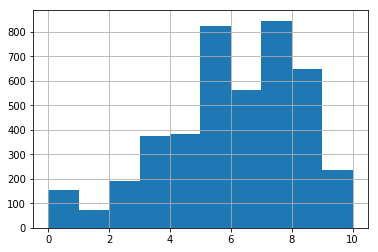

In [5]:
df['ppltrst'][df['year'] == 2012].hist()

Both samples' p-value are less than .05 which means we reject the null that the samples are drawn from a normally distributed population. Also since these are dependent groups meaning that the same participants are in both samples, paired non-parametric t-test would be most apporiate. 

In [6]:
country_list = list(df['cntry'].unique())

for country in country_list:
    x = df['ppltrst'][(df['cntry'] == country) & (df['year'] == 2012)]
    y = df['ppltrst'][(df['cntry'] == country) & (df['year'] == 2014)]
    t,p = stats.ttest_rel(x,y)
    print()
    print(country)
    if p < .05 and t > 0:
        print('No they became more trusting')
    elif p < .05 and t < 0:
        print('Yes they became more less trusting')
    else:
        print('No difference')
    


CH
No difference

CZ
No difference

DE
No difference

ES
No difference

NO
No difference

SE
No difference


As we can see for each country, people are as trusting in 2012 as 2014. 

# Did people become happier from 2012 to 2014? Compute results for each country in the sample.


In [7]:
# check for normality for each sample

print('2014: ', stats.shapiro(np.asarray(df['happy'][df['year'] == 2014].dropna())))
print('2012: ', stats.shapiro(np.asarray(df['happy'][df['year'] == 2012].dropna())))


2014:  (0.90348219871521, 0.0)
2012:  (0.8950968980789185, 0.0)


Same as the previous question, the shapiro test evaluates if the sample is from a normally distributed population. Looking at the p-value, there is a zero percent change that both samples are. 

In [8]:

for country in country_list:
    x = df['happy'][(df['cntry'] == country) & (df['year'] == 2012)]
    y = df['happy'][(df['cntry'] == country) & (df['year'] == 2014)]
    t,p = stats.ttest_rel(x,y)
    print()
    print(country)
    if p < .05 and t > 0:
        print('No they became more trusting')
    elif p < .05 and t < 0:
        print('Yes they became more less trusting')
    else:
        print('No difference')
    


CH
No difference

CZ
No difference

DE
No difference

ES
No difference

NO
No difference

SE
No difference


As we can see for each country, people are as happy in 2012 as 2014. 

# Who reported watching more TV in 2012, men or women?


In [9]:
# check for normality for each sample

print('Male: ', stats.shapiro(np.asarray(df['tvtot'][df['is_male'] == 1].dropna())))
print('Female: ', stats.shapiro(np.asarray(df['tvtot'][df['is_male'] == 0].dropna())))


Male:  (0.9435075521469116, 8.185168180479776e-38)
Female:  (0.9410152435302734, 3.082838965153947e-38)


In [10]:
female_sample = df['tvtot'][(df['is_male'] == 0) & (df['year'] == 2012)].dropna()
male_sample = df['tvtot'][(df['is_male'] == 1) & (df['year'] == 2012)].dropna()

df['tvtot_rank'] = stats.rankdata(df['tvtot'])


print('Female:')
print('Median TV: ', female_sample.median())
print('TV Sum', female_sample.sum())
print()
print('Male')
print('Median TV: ', male_sample.median())
print('TV Sum', male_sample.sum())
print()
print('Overall Median: ', df['tvtot'].median())
print()

print('Kruskal Test: ', stats.kruskal(female_sample, male_sample))
t, p, _, _ = stats.median_test(female_sample, male_sample)

print('Median Test: {} ... P-Value: {}'.format(t, p))

Female:
Median TV:  4.0
TV Sum 8441.0

Male
Median TV:  4.0
TV Sum 8393.0

Overall Median:  4.0

Kruskal Test:  KruskalResult(statistic=0.5766091020549451, pvalue=0.447644522500795)
Median Test: 0.10448797978115423 ... P-Value: 0.7465089423999145


# Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?


In [11]:
single_sample = df['pplfair'][(df['partner'] == 0) & (df['year'] == 2012)].dropna()
couple_sample = df['pplfair'][(df['partner'] == 1) & (df['year'] == 2012)].dropna()

# check for normality for each sample

print('Single: ', stats.shapiro(single_sample))
print('Couple: ', stats.shapiro(couple_sample))


Single:  (0.9561690092086792, 1.4302870646482291e-21)
Couple:  (0.9411795139312744, 2.4948774386456788e-31)


In [12]:
print('Single:')
print('Median Fair Score: ', single_sample.median())
print('Fair Sum', single_sample.sum())
print()
print('Couples')
print('Median Fair Score: ', couple_sample.median())
print('Fair Sum', couple_sample.sum())
print()
print('Overall median: ', df['pplfair'].median())

Single:
Median Fair Score:  6.0
Fair Sum 9418.0

Couples
Median Fair Score:  7.0
Fair Sum 16235.0

Overall median:  6.0


# Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

In [13]:
ch = df['sclmeet'][(df['cntry'] == 'CH') & (df['year'] == 2014)].dropna()
cz = df['sclmeet'][(df['cntry'] == 'CZ') & (df['year'] == 2014)].dropna()
de = df['sclmeet'][(df['cntry'] == 'DE') & (df['year'] == 2014)].dropna()

# check for normality for each sample

print('CH: ', stats.shapiro(ch))
print('CZ: ', stats.shapiro(cz))
print('DE: ', stats.shapiro(de))

CH:  (0.8974164724349976, 2.7436334896806913e-22)
CZ:  (0.9451602101325989, 7.663770300607355e-15)
DE:  (0.8616600036621094, 0.032099850475788116)


In [14]:
stats.kruskal(ch, cz, de)

KruskalResult(statistic=90.64258320601328, pvalue=2.075932098411105e-20)

In [15]:
print('CH vs. CZ: ', stats.kruskal(ch, cz))
print('CH vs. DE: ', stats.kruskal(ch, de))
print('DE vs. CZ: ', stats.kruskal(de, cz))

CH vs. CZ:  KruskalResult(statistic=87.94131736160504, pvalue=6.74254394179896e-21)
CH vs. DE:  KruskalResult(statistic=6.811209280804956, pvalue=0.009058739707675768)
DE vs. CZ:  KruskalResult(statistic=0.02251746084255729, pvalue=0.8807187047553632)


There is a significant difference between CH and CZ and CH and DE. Although DE and CZ are very similar in regards to sample median and the probability of their population medians to be equal is 88%. 

# Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

In [45]:
ch = df[(df['cntry'] == 'CH') & (df['year'] == 2014)].dropna()
cz = df[(df['cntry'] == 'CZ') & (df['year'] == 2014)].dropna()
de = df[(df['cntry'] == 'DE') & (df['year'] == 2014)].dropna()

# check for normality between each countries sclact sample
print('CH: ', stats.shapiro(ch['sclact']))
print('CZ: ', stats.shapiro(cz['sclact']))
print('DE: ', stats.shapiro(de['sclact']))
print()

age_list = list(df['agea'].unique())
for age in age_list:
    
    has_data = {}
    
    ch = ch[ch['agea'] == age].dropna()
    cz = cz[cz['agea'] == age].dropna()
    de = de[de['agea'] == age].dropna()
    
    for i,age_sample in enumerate([ch, cz, de]):
        
        if len(age_sample != 0):
            has_data[str(i+1)] = age_sample['sclact']
            t,p = stats.shapiro(age_sample['sclact'])
            if p > .05:
                print(age_sample['cntry'].unique(), age)
    print(len(has_data))   
    if len(has_data) == 0:
        print('No samples for age: {}'.format(age))
        
    elif len(has_data) == 2:
        t,p = stats.kruskal(has_data['1'], has_data['2'])
        if p < .05:
            cntry_1 = has_data['1']['cntry']
            cntry_2 = has_data['1']['cntry']
            print('{} vs {}: {}'.format(cntry_1, cntry_2, stats.kruskal(has_data['1'], has_data['2'])))
        else:
            print("""There is no significant difference in social activity among three countries\'
            {} year old samples""".format(round(age)))
    else:
        t,p = stats.kruskal(has_data['1'], has_data['2'], has_data['3'])

CH:  (0.8914050459861755, 1.883037234053481e-22)
CZ:  (0.8518425226211548, 1.6444474523379619e-23)
DE:  (0.7937105894088745, 0.004176934715360403)

2
There is no significant difference in social activity among three countries'
            60.0 year old samples
0
No samples for age: 59.0
0
No samples for age: 24.0
0
No samples for age: 64.0
0
No samples for age: 55.0
0
No samples for age: nan
0
No samples for age: 76.0
0
No samples for age: 30.0
0
No samples for age: 84.0
0
No samples for age: 62.0
0
No samples for age: 33.0
0
No samples for age: 40.0
0
No samples for age: 69.0
0
No samples for age: 32.0
0
No samples for age: 70.0
0
No samples for age: 61.0
0
No samples for age: 21.0
0
No samples for age: 36.0
0
No samples for age: 51.0
0
No samples for age: 25.0
0
No samples for age: 20.0
0
No samples for age: 22.0
0
No samples for age: 35.0
0
No samples for age: 26.0
0
No samples for age: 54.0
0
No samples for age: 38.0
0
No samples for age: 82.0
0
No samples for age: 53.0
0
No sample